In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

In [2]:
# read images
img_grey_1 = cv2.imread('thermal_1579648028_0_0.png', cv2.IMREAD_GRAYSCALE)
img_grey_2 = cv2.imread('thermal_1597528867_0_0.png', cv2.IMREAD_GRAYSCALE)

# scaling between 0 and 1
img_df_1 = img_grey_1/255
img_df_2 = img_grey_2/255

In [3]:
# fit and transform data in pca

pca_1 = PCA(n_components=30)
pca_1.fit(img_df_1)
trans_pca_1 = pca_1.transform(img_df_1)
img_reduced_1 = pca_1.inverse_transform(trans_pca_1)

pca_2 = PCA(n_components=30)
pca_2.fit(img_df_2)
trans_pca_2 = pca_2.transform(img_df_2)
img_reduced_2 = pca_2.inverse_transform(trans_pca_2)

In [4]:
# new dimensions
[trans_pca_1.shape, trans_pca_2.shape]

[(512, 30), (512, 30)]

In [5]:
print(f"Image 1 : {sum(pca_1.explained_variance_ratio_)}")
print(f"Image 2 : {sum(pca_2.explained_variance_ratio_)}")

Image 1 : 0.9651822387297871
Image 2 : 0.9808437684944771


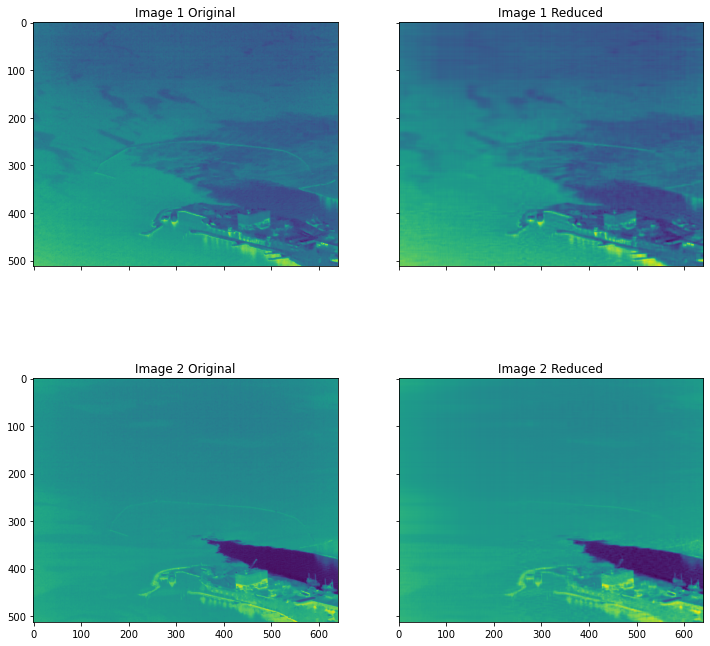

In [6]:
# plotting originals and reduced (inverse transform of the transformed image)

fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize = (12,12))
axs[0,0].imshow(img_grey_1)
axs[0,1].imshow(img_reduced_1)

axs[1,0].imshow(img_grey_2)
axs[1,1].imshow(img_reduced_2)

axs[0,0].set_title('Image 1 Original')
axs[0,1].set_title('Image 1 Reduced')
axs[1,0].set_title('Image 2 Original')
axs[1,1].set_title('Image 2 Reduced')

plt.show()